<a href="https://colab.research.google.com/github/Marouene-Oueslati/Notebooks_DL-AI-TensorFlow-Developer-Professional-Certificate/blob/master/flowers_image_classifications_TF_Dev_certif_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FLOWERS CLASSIFICATION

In [48]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.version.VERSION)

2.6.0


In [2]:
!python --version

!nvidia-smi

Python 3.7.12
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [3]:
import PIL
import PIL.Image
import os

In [129]:
#direct choice

#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

#!wget --no-check-certificate "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

#dataset = tarfile.open('flower_photos.tgz')
#dataset.extractall('./') # specify which folder to extract to
#dataset.close()


--2021-10-20 23:17:32--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   162MB/s    in 1.3s    

2021-10-20 23:17:33 (162 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [4]:
#Alternative
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


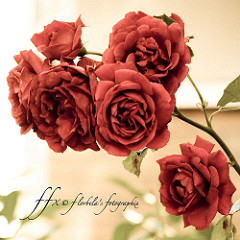

In [6]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[100]))

In [140]:
R1 = PIL.Image.open(roses[0])
R1 = np.array(R1)
print(R1.shape)

(230, 240, 3)


In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 123,
    shuffle=True,
    image_size = (180,180),
    batch_size = 32
    )

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [9]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    shuffle=True,
    image_size = (180,180),
    batch_size = 32
    )

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


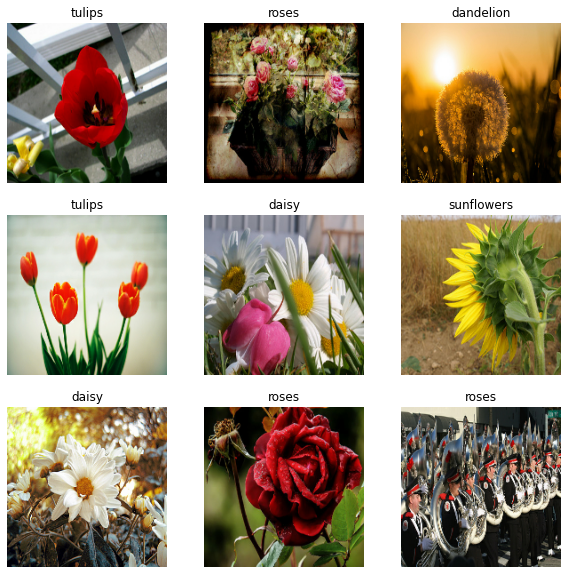

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2): # take(batchsize number)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [34]:
for images, labels in train_ds.take(1):
  for i in range(9):
    print(images[i].shape)
    print(tf.shape(labels[i]))
    #print(train_ds.class_names[labels[i].shape])
  break

(180, 180, 3)
tf.Tensor([], shape=(0,), dtype=int32)
(180, 180, 3)
tf.Tensor([], shape=(0,), dtype=int32)
(180, 180, 3)
tf.Tensor([], shape=(0,), dtype=int32)
(180, 180, 3)
tf.Tensor([], shape=(0,), dtype=int32)
(180, 180, 3)
tf.Tensor([], shape=(0,), dtype=int32)
(180, 180, 3)
tf.Tensor([], shape=(0,), dtype=int32)
(180, 180, 3)
tf.Tensor([], shape=(0,), dtype=int32)
(180, 180, 3)
tf.Tensor([], shape=(0,), dtype=int32)
(180, 180, 3)
tf.Tensor([], shape=(0,), dtype=int32)


In [39]:
#Rescale input to range from 0 to 1 instaed of 0 to 255 of pixel value
#normalization_layer = tf.keras.layers.Rescaling(1./255)

In [45]:
num_classes = len(class_names)
print(num_classes)

model = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape = (180, 180, 3)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  #tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes) # due from logits true don't apply softmax
])


from tensorflow.keras.optimizers import RMSprop

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

5


In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 20, 20, 128)      

In [47]:
HIS = model.fit(train_ds, validation_data=validation_ds, epochs=50, batch_size = 128)

Epoch 1/50
92/92 [==============================] - 185s 2s/step - loss: 1.3704 - accuracy: 0.3954 - val_loss: 1.1792 - val_accuracy: 0.5177
Epoch 2/50
92/92 [==============================] - 185s 2s/step - loss: 1.1440 - accuracy: 0.5249 - val_loss: 1.0799 - val_accuracy: 0.5613
Epoch 3/50
92/92 [==============================] - 185s 2s/step - loss: 1.0593 - accuracy: 0.5736 - val_loss: 1.0621 - val_accuracy: 0.5886
Epoch 4/50
92/92 [==============================] - 185s 2s/step - loss: 0.9693 - accuracy: 0.6311 - val_loss: 1.1365 - val_accuracy: 0.5450
Epoch 5/50
92/92 [==============================] - 185s 2s/step - loss: 0.9217 - accuracy: 0.6502 - val_loss: 1.0516 - val_accuracy: 0.5790
Epoch 6/50
92/92 [==============================] - 185s 2s/step - loss: 0.8562 - accuracy: 0.6659 - val_loss: 0.9935 - val_accuracy: 0.6144
Epoch 7/50
92/92 [==============================] - 184s 2s/step - loss: 0.8055 - accuracy: 0.6958 - val_loss: 0.9504 - val_accuracy: 0.6281
Epoch 8/50
92

KeyboardInterrupt: ignored

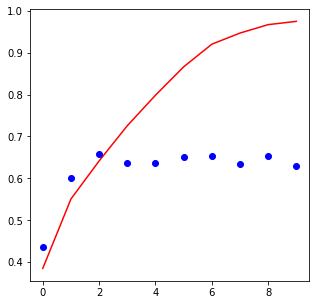

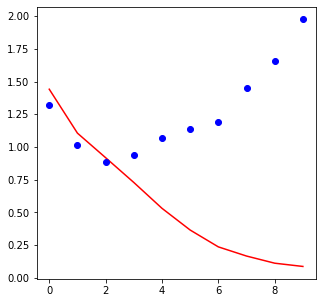

In [109]:
import matplotlib.pyplot as plt



plt.figure(figsize=(5, 5))
epochs = range(len(HIS.history['accuracy']))
epochs
plt.plot(epochs, HIS.history['accuracy'],'r')
plt.plot(epochs, HIS.history['val_accuracy'],'bo')
plt.show()


plt.figure(figsize=(5, 5))
plt.plot(epochs, HIS.history['loss'],'r')
plt.plot(epochs, HIS.history['val_loss'],'bo')
plt.show()


In [80]:
# New attempt with regularization

In [113]:
num_classes = len(class_names)
print(num_classes)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape = (200,200,3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu',kernel_regularizer='l2'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu',kernel_regularizer='l2'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation = 'softmax')
])

5


In [114]:
model.compile(optimizer='Adam', loss = tf.losses.sparse_categorical_crossentropy, metrics = 'accuracy')

In [116]:
HIS = model.fit(train_ds, validation_data=validation_ds, epochs=50, batch_size=128)

Epoch 1/50
92/92 [==============================] - 10s 105ms/step - loss: 0.2787 - accuracy: 0.9486 - val_loss: 1.4004 - val_accuracy: 0.6458
Epoch 2/50
92/92 [==============================] - 10s 104ms/step - loss: 0.2592 - accuracy: 0.9598 - val_loss: 1.3720 - val_accuracy: 0.6553
Epoch 3/50
92/92 [==============================] - 10s 103ms/step - loss: 0.2228 - accuracy: 0.9646 - val_loss: 1.5741 - val_accuracy: 0.6431
Epoch 4/50
92/92 [==============================] - 10s 104ms/step - loss: 0.1978 - accuracy: 0.9782 - val_loss: 1.5628 - val_accuracy: 0.6512
Epoch 5/50
92/92 [==============================] - 10s 103ms/step - loss: 0.1710 - accuracy: 0.9813 - val_loss: 1.5660 - val_accuracy: 0.6567
Epoch 6/50
92/92 [==============================] - 10s 103ms/step - loss: 0.1708 - accuracy: 0.9789 - val_loss: 1.5066 - val_accuracy: 0.6649
Epoch 7/50
92/92 [==============================] - 10s 104ms/step - loss: 0.1467 - accuracy: 0.9843 - val_loss: 1.5920 - val_accuracy: 0.6676

KeyboardInterrupt: ignored

In [167]:
# Let's see the data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split = 0.2,
                                   horizontal_flip = True)

#test_datagen = ImageDataGenerator( rescale = 1.0/255.)
                                  

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(data_dir,
                                                    batch_size = 64,
                                                    class_mode = 'categorical', 
                                                    target_size = (150,150),
                                                    subset = 'training'
                                                    )     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  train_datagen.flow_from_directory(data_dir,
                                                          batch_size  = 64,
                                                          class_mode  = 'categorical', 
                                                          target_size = (150,150),
                                                          subset = 'validation'
                                                          )

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [175]:
num_classes = len(class_names)
print(num_classes)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape = (150,150,3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu',kernel_regularizer='l2'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

5


In [176]:
model.compile(optimizer='RMSprop', loss = tf.losses.categorical_crossentropy, metrics = 'accuracy')

In [177]:
model.fit(train_generator, validation_data=validation_generator, epochs=50)

Epoch 1/50
37/46 [=======================>......] - ETA: 4s - loss: 9.8138 - accuracy: 0.1972

KeyboardInterrupt: ignored